# Clustering

### Data Preprocessing

In [66]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
uni = pd.read_csv("/Users/utkarshhajare/DS material/Assignements/Clustering/Universities.csv")

In [3]:
uni

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


Here each university is unique hence there are total 24 universities. Excel provided by class, East West Airlines, has no accurate data hence performing assignment on University data only

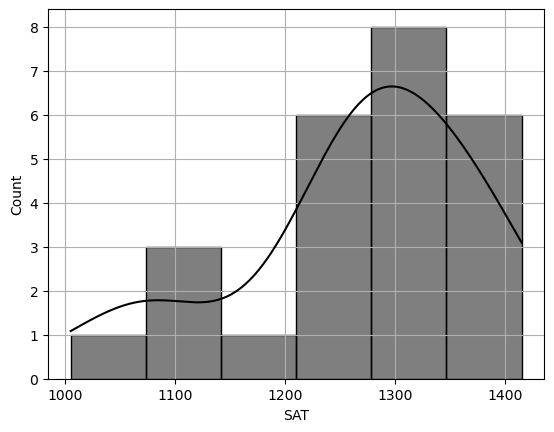

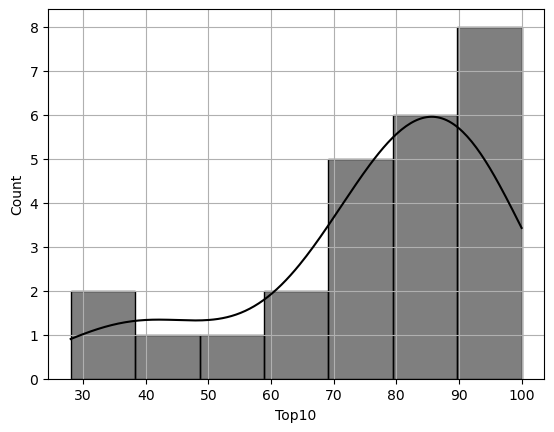

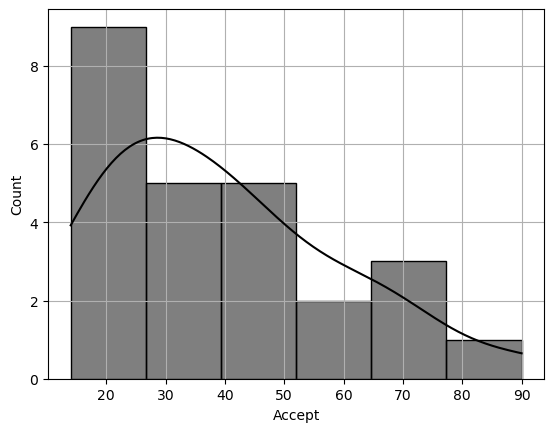

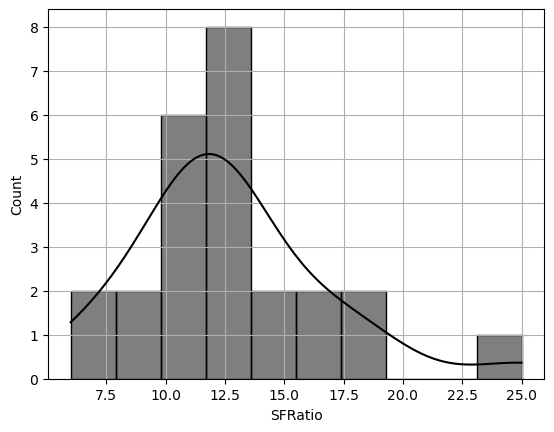

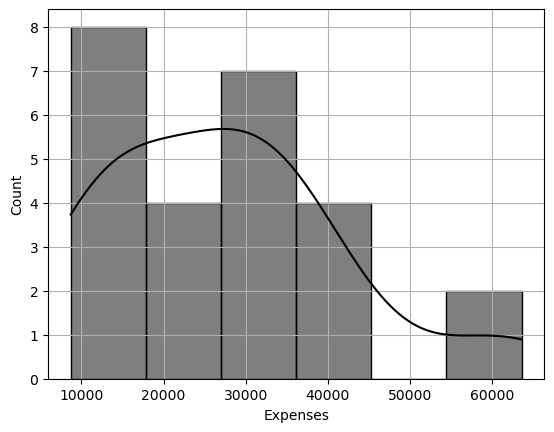

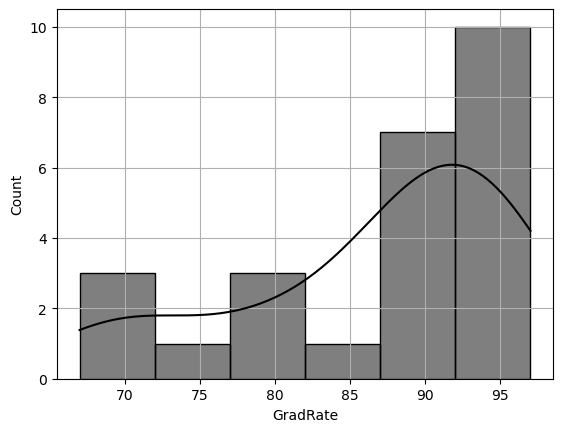

In [4]:
for col in uni.select_dtypes(include=['number']):
    #plt.figure(figsize=(10,6))
    sn.histplot(data=uni[col], kde=True, color='black')
    plt.grid()
    plt.show()

**Standardizing the data**

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
uni_std = scaler.fit_transform(uni.select_dtypes(include=['number']))

In [6]:
uni_std

array([[ 0.41028362,  0.6575195 , -0.88986682,  0.07026045, -0.33141256,
         0.82030265],
       [ 1.39925928,  1.23521235, -0.73465749, -1.68625071,  2.56038138,
        -0.64452351],
       [-0.06065717, -0.76045386,  1.02438157, -0.93346022, -0.16712136,
        -1.65863393],
       [ 0.41028362, -0.02520842, -0.78639393, -0.18066972,  0.29164871,
         0.14422904],
       [ 0.12771914,  0.34241431, -0.32076595,  0.07026045, -0.39084607,
         0.36958691],
       [ 0.69284809,  0.6575195 , -0.83813038, -0.68253005,  0.33778044,
         0.93298158],
       [ 0.4573777 ,  0.71003703, -0.47597528, -0.18066972,  0.29695528,
         0.93298158],
       [-0.10775125, -0.13024348, -0.78639393, -0.18066972, -0.51381683,
         0.59494478],
       [ 1.25797704,  0.76255456, -1.30375836, -0.43159988,  0.85874344,
         1.15833946],
       [ 0.36318954, -0.07772595,  0.24833493, -1.43532055,  2.21481798,
         0.0315501 ],
       [ 1.06960072,  0.92010716, -0.47597528, -0.

## Hierarchical clustering

**Single linkage method**

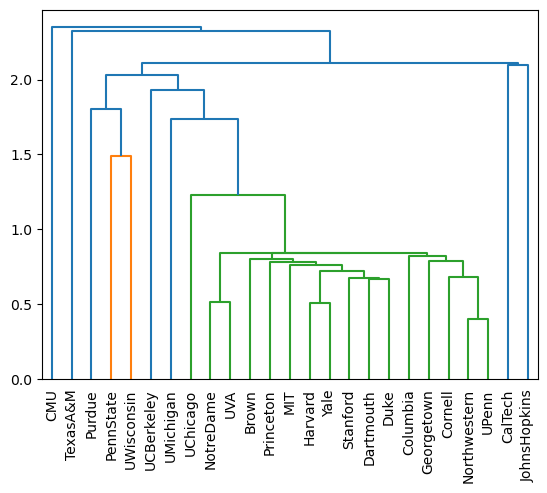

In [7]:
dendrogram = sch.dendrogram(sch.linkage(uni_std, method='single'), labels=uni['Univ'].tolist())
plt.xticks(rotation=90)
plt.show()

**Complete linkage method**

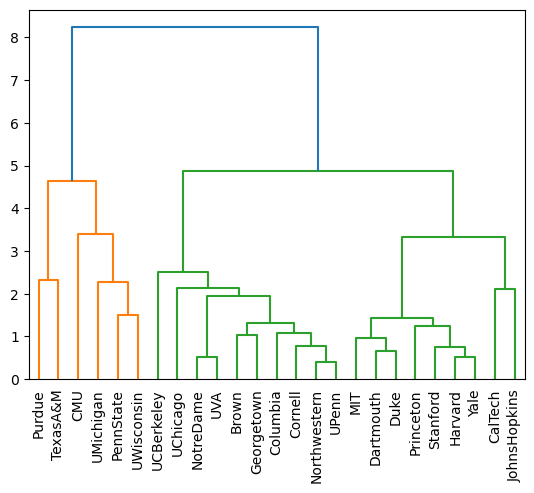

In [8]:
dendrogram = sch.dendrogram(sch.linkage(uni_std, method='complete'), labels=uni['Univ'].tolist())
plt.xticks(rotation=90)
plt.show()

**Ward linkage method**

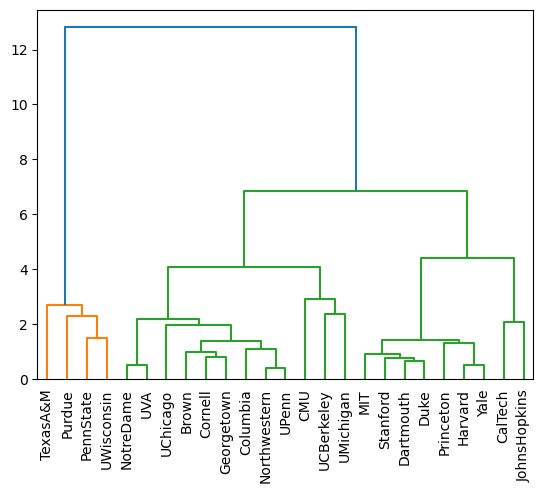

In [9]:
dendrogram = sch.dendrogram(sch.linkage(uni_std, method='ward'), labels=uni['Univ'].tolist())
plt.xticks(rotation=90)
plt.show()

### Creating clusters
**Single linkage method**

In [10]:
hc = AgglomerativeClustering(n_clusters=4, metric = 'euclidean', linkage = 'single')

In [11]:
y_hc = hc.fit_predict(uni_std)
Clusters = pd.DataFrame(y_hc, columns=['Clusters'])

In [12]:
hc.labels_

array([1, 0, 3, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1])

**Making inverse fit trasformation for standardized data**

In [13]:
uni_original = scaler.inverse_transform(uni_std)

In [14]:
uni_std_df = pd.DataFrame(uni_original, columns=uni.iloc[:, -6:].columns)
uni_std_df['h_clusterid'] = hc.labels_
uni_std_df['univ'] = uni['Univ']

In [15]:
uni_std_df.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,h_clusterid,univ
0,1310.0,89.0,22.0,13.0,22704.0,94.0,1,Brown
1,1415.0,100.0,25.0,6.0,63575.0,81.0,0,CalTech
2,1260.0,62.0,59.0,9.0,25026.0,72.0,3,CMU
3,1310.0,76.0,24.0,12.0,31510.0,88.0,1,Columbia
4,1280.0,83.0,33.0,13.0,21864.0,90.0,1,Cornell


In [16]:
uni_std_df1 = uni_std_df.sort_values('h_clusterid')
uni_std_df1.iloc[:,[-2,-1]]

,h_clusterid,univ
1,0,CalTech
9,0,JohnsHopkins
0,1,Brown
22,1,UVA
21,1,UPenn
20,1,UMichigan
19,1,UChicago
18,1,UCBerkeley
16,1,Stanford
15,1,Purdue


In [17]:
uni_std_df1.select_dtypes(include=['number']).groupby(['h_clusterid']).mean()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
h_clusterid,,,,,,
0,1360.000000,87.500000,34.500000,6.500000,61133.000000,84.000000
1,1266.952381,77.428571,37.380952,12.904762,25176.380952,88.619048
2,1075.000000,49.000000,67.000000,25.000000,8704.000000,67.000000
3,1260.000000,62.000000,59.000000,9.000000,25026.000000,72.000000


Now we are going to try few combinations for clustering using linkage & metric methods.

**Metric: euclidean, linkage: ward**

In [18]:
hc_ew = AgglomerativeClustering(n_clusters=4, metric = 'euclidean', linkage = 'ward')

In [19]:
y_hc_ew = hc_ew.fit_predict(uni_std)

In [20]:
hc_ew.labels_

array([0, 2, 0, 0, 0, 3, 3, 0, 3, 2, 3, 0, 0, 1, 3, 1, 3, 1, 0, 0, 0, 0,
       0, 1, 3])

In [21]:
uni_std_df_ew = pd.DataFrame(uni_original, columns=uni.iloc[:, -6:].columns)
uni_std_df_ew['h_clusterid'] = hc_ew.labels_
uni_std_df_ew['univ'] = uni['Univ']

In [22]:
uni_std_df_ew.head()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,h_clusterid,univ
0,1310.0,89.0,22.0,13.0,22704.0,94.0,0,Brown
1,1415.0,100.0,25.0,6.0,63575.0,81.0,2,CalTech
2,1260.0,62.0,59.0,9.0,25026.0,72.0,0,CMU
3,1310.0,76.0,24.0,12.0,31510.0,88.0,0,Columbia
4,1280.0,83.0,33.0,13.0,21864.0,90.0,0,Cornell


In [23]:
uni_std_df2 = uni_std_df_ew.sort_values('h_clusterid')
uni_std_df2.iloc[:,[-2,-1]]

,h_clusterid,univ
0,0,Brown
22,0,UVA
21,0,UPenn
20,0,UMichigan
19,0,UChicago
18,0,UCBerkeley
11,0,Northwestern
12,0,NotreDame
2,0,CMU
3,0,Columbia


In [24]:
uni_std_df2.select_dtypes(include=['number']).groupby(['h_clusterid']).mean()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
h_clusterid,,,,,,
0,1262.500000,78.500000,40.083333,12.833333,22858.000000,87.583333
1,1061.500000,38.750000,70.000000,19.250000,9953.000000,71.750000
2,1360.000000,87.500000,34.500000,6.500000,61133.000000,84.000000
3,1363.571429,91.428571,21.428571,10.571429,35475.142857,94.571429


**Metric: manhattan, linkage: average**

In [25]:
hc_ma = AgglomerativeClustering(n_clusters=4, metric = 'manhattan', linkage = 'average')

In [26]:
y_hc_ma = hc_ma.fit_predict(uni_std)

In [27]:
hc_ma.labels_

array([3, 2, 0, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 1, 3, 1, 3, 1, 0, 3, 0, 3,
       3, 1, 3])

In [28]:
uni_std_df_ma = pd.DataFrame(uni_original, columns=uni.iloc[:, -6:].columns)
uni_std_df_ma['h_clusterid'] = hc_ma.labels_
uni_std_df_ma['univ'] = uni['Univ']

In [29]:
uni_std_df_ma

,SAT,Top10,Accept,SFRatio,Expenses,GradRate,h_clusterid,univ
0,1310.0,89.0,22.0,13.0,22704.0,94.0,3,Brown
1,1415.0,100.0,25.0,6.0,63575.0,81.0,2,CalTech
2,1260.0,62.0,59.0,9.0,25026.0,72.0,0,CMU
3,1310.0,76.0,24.0,12.0,31510.0,88.0,3,Columbia
4,1280.0,83.0,33.0,13.0,21864.0,90.0,3,Cornell
5,1340.0,89.0,23.0,10.0,32162.0,95.0,3,Dartmouth
6,1315.0,90.0,30.0,12.0,31585.0,95.0,3,Duke
7,1255.0,74.0,24.0,12.0,20126.0,92.0,3,Georgetown
8,1400.0,91.0,14.0,11.0,39525.0,97.0,3,Harvard
9,1305.0,75.0,44.0,7.0,58691.0,87.0,2,JohnsHopkins


In [30]:
uni_std_df3 = uni_std_df_ma.sort_values('h_clusterid')
uni_std_df3.iloc[:,[-2,-1]]

,h_clusterid,univ
2,0,CMU
20,0,UMichigan
18,0,UCBerkeley
17,1,TexasA&M
15,1,Purdue
23,1,UWisconsin
13,1,PennState
1,2,CalTech
9,2,JohnsHopkins
0,3,Brown


In [31]:
uni_std_df3.select_dtypes(include=['number']).groupby(['h_clusterid']).mean()

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
h_clusterid,,,,,,
0,1226.666667,74.00,55.666667,14.000,18545.333333,78.333333
1,1061.500000,38.75,70.000000,19.250,9953.000000,71.750000
2,1360.000000,87.50,34.500000,6.500,61133.000000,84.000000
3,1313.437500,85.00,29.000000,11.625,29186.625000,92.375000


## K-means

In [32]:
from sklearn.cluster import KMeans

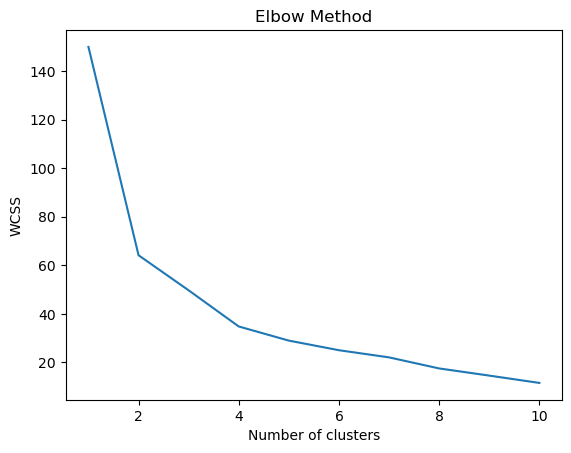

In [33]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(uni_std)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

K=4

In [34]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(uni_std)

KMeans(n_clusters=4, random_state=42)

In [35]:
clusters_new.labels_

array([2, 0, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 1, 2, 3, 2, 2, 1, 2,
       2, 1, 2], dtype=int32)

In [36]:
uni['clusterid_new'] = clusters_new.labels_

In [37]:
clusters_new.cluster_centers_

array([[ 0.88122441,  0.5787432 , -0.24316128, -1.56078563,  2.38759968,
        -0.3064867 ],
       [-1.35856999, -1.56922385,  1.49000956,  0.67249284, -0.92455897,
        -1.27552555],
       [ 0.4019729 ,  0.47834204, -0.4942352 , -0.19543032,  0.06879803,
         0.5419194 ],
       [-1.8031381 , -1.44318177,  1.43827311,  3.08142243, -1.32197103,
        -2.22202861]])

In [38]:
uni.groupby('clusterid_new')[uni.select_dtypes(include='number').columns].agg(['mean']).reset_index()

,clusterid_new,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusterid_new
,,mean,mean,mean,mean,mean,mean,mean
0,0,1360.000000,87.500000,34.500000,6.500000,61133.000000,84.000000,0.0
1,1,1122.200000,46.600000,68.000000,15.400000,14320.800000,75.400000,1.0
2,2,1309.117647,85.588235,29.647059,11.941176,28360.352941,91.529412,2.0
3,3,1075.000000,49.000000,67.000000,25.000000,8704.000000,67.000000,3.0


In [39]:
uni

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusterid_new
0,Brown,1310,89,22,13,22704,94,2
1,CalTech,1415,100,25,6,63575,81,0
2,CMU,1260,62,59,9,25026,72,1
3,Columbia,1310,76,24,12,31510,88,2
4,Cornell,1280,83,33,13,21864,90,2
5,Dartmouth,1340,89,23,10,32162,95,2
6,Duke,1315,90,30,12,31585,95,2
7,Georgetown,1255,74,24,12,20126,92,2
8,Harvard,1400,91,14,11,39525,97,2
9,JohnsHopkins,1305,75,44,7,58691,87,0


K=6

In [41]:
clusters_new6 = KMeans(6, random_state=42)
clusters_new6.fit(uni_std)

KMeans(n_clusters=6, random_state=42)

In [42]:
clusters_new6.labels_

array([2, 0, 5, 2, 2, 4, 4, 2, 4, 0, 4, 2, 2, 1, 4, 1, 4, 3, 2, 2, 1, 2,
       2, 1, 4], dtype=int32)

In [43]:
uni['clusterid_new'] = clusters_new6.labels_

In [44]:
clusters_new6.cluster_centers_

array([[ 0.88122441,  0.5787432 , -0.24316128, -1.56078563,  2.38759968,
        -0.3064867 ],
       [-1.6830482 , -1.77141634,  1.60641655,  1.07398111, -1.11391837,
        -1.17974845],
       [ 0.0429498 ,  0.26363801, -0.19659848,  0.04516743, -0.28358274,
         0.30197955],
       [-1.8031381 , -1.44318177,  1.43827311,  3.08142243, -1.32197103,
        -2.22202861],
       [ 0.91486304,  0.78506207, -0.9194305 , -0.53914138,  0.57219913,
         0.88469061],
       [-0.06065717, -0.76045386,  1.02438157, -0.93346022, -0.16712136,
        -1.65863393]])

In [45]:
uni.groupby('clusterid_new')[uni.select_dtypes(include='number').columns].agg(['mean']).reset_index()

,clusterid_new,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusterid_new
,,mean,mean,mean,mean,mean,mean,mean
0,0,1360.000000,87.500000,34.500000,6.500000,61133.000000,84.000000,0.0
1,1,1087.750000,42.750000,70.250000,17.000000,11644.500000,76.250000,1.0
2,2,1271.000000,81.500000,35.400000,12.900000,23380.000000,89.400000,2.0
3,3,1075.000000,49.000000,67.000000,25.000000,8704.000000,67.000000,3.0
4,4,1363.571429,91.428571,21.428571,10.571429,35475.142857,94.571429,4.0
5,5,1260.000000,62.000000,59.000000,9.000000,25026.000000,72.000000,5.0


## DBSCAN

In [46]:
from sklearn.cluster import DBSCAN

In [52]:
uni_std

array([[ 0.41028362,  0.6575195 , -0.88986682,  0.07026045, -0.33141256,
         0.82030265],
       [ 1.39925928,  1.23521235, -0.73465749, -1.68625071,  2.56038138,
        -0.64452351],
       [-0.06065717, -0.76045386,  1.02438157, -0.93346022, -0.16712136,
        -1.65863393],
       [ 0.41028362, -0.02520842, -0.78639393, -0.18066972,  0.29164871,
         0.14422904],
       [ 0.12771914,  0.34241431, -0.32076595,  0.07026045, -0.39084607,
         0.36958691],
       [ 0.69284809,  0.6575195 , -0.83813038, -0.68253005,  0.33778044,
         0.93298158],
       [ 0.4573777 ,  0.71003703, -0.47597528, -0.18066972,  0.29695528,
         0.93298158],
       [-0.10775125, -0.13024348, -0.78639393, -0.18066972, -0.51381683,
         0.59494478],
       [ 1.25797704,  0.76255456, -1.30375836, -0.43159988,  0.85874344,
         1.15833946],
       [ 0.36318954, -0.07772595,  0.24833493, -1.43532055,  2.21481798,
         0.0315501 ],
       [ 1.06960072,  0.92010716, -0.47597528, -0.

In [59]:
dbscan = DBSCAN(eps=0.8, min_samples=3)
labels = dbscan.fit_predict(uni_std)

In [60]:
dbscan.labels_

array([-1, -1, -1, -1,  0,  1,  1,  0,  1, -1,  1,  0, -1, -1,  1, -1,  1,
       -1, -1, -1, -1,  0, -1, -1,  1])

In [61]:
cl = pd.DataFrame(dbscan.labels_, columns=['cluster'])
cl

,cluster
0,-1
1,-1
2,-1
3,-1
4,0
5,1
6,1
7,0
8,1
9,-1


In [63]:
pd.concat([uni,cl],axis=1)

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,clusterid_new,cluster
0,Brown,1310,89,22,13,22704,94,2,-1
1,CalTech,1415,100,25,6,63575,81,0,-1
2,CMU,1260,62,59,9,25026,72,5,-1
3,Columbia,1310,76,24,12,31510,88,2,-1
4,Cornell,1280,83,33,13,21864,90,2,0
5,Dartmouth,1340,89,23,10,32162,95,4,1
6,Duke,1315,90,30,12,31585,95,4,1
7,Georgetown,1255,74,24,12,20126,92,2,0
8,Harvard,1400,91,14,11,39525,97,4,1
9,JohnsHopkins,1305,75,44,7,58691,87,0,-1


To plot the plot for DBSCAN we need to reduce the dimensions to 2D

In [64]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(uni_std)

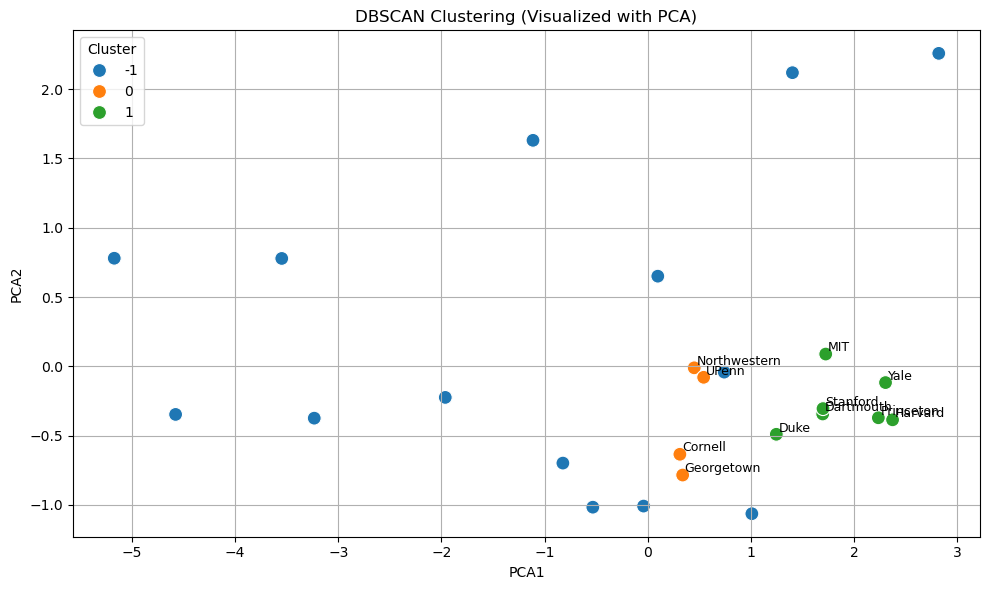

In [67]:
plot_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
plot_df['Cluster'] = labels
plot_df['University'] = uni['Univ']
plt.figure(figsize=(10, 6))
sns.scatterplot(data=plot_df, x='PCA1', y='PCA2', hue='Cluster', palette='tab10', s=100)
for i in range(len(plot_df)):
    if plot_df['Cluster'][i] != -1:  # skip noise for cleaner labels
        plt.text(plot_df['PCA1'][i] + 0.02, plot_df['PCA2'][i] + 0.02,
                 plot_df['University'][i], fontsize=9)
plt.title('DBSCAN Clustering (Visualized with PCA)')
plt.grid(True)
plt.tight_layout()
plt.show()

Plot for Kmeans

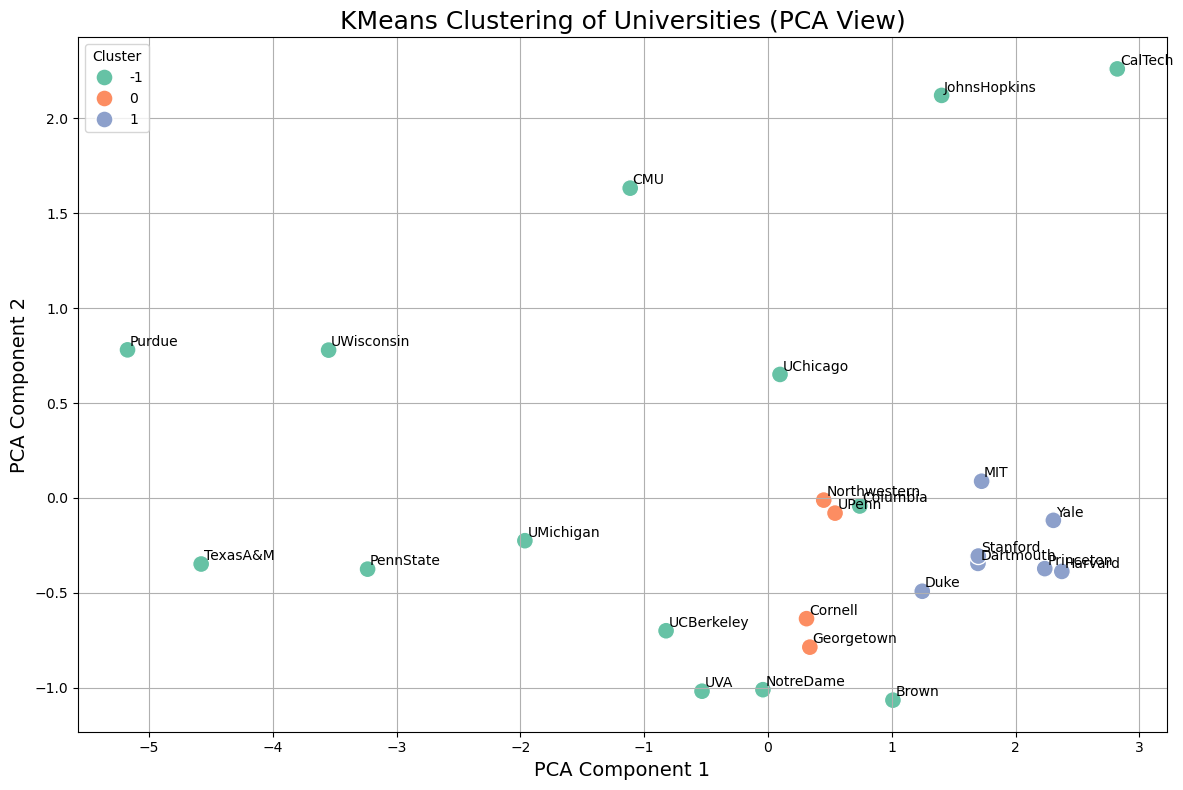

In [69]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=plot_df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=150)
for i in range(len(plot_df)):
    plt.text(plot_df['PCA1'][i] + 0.02, plot_df['PCA2'][i] + 0.02,
             plot_df['University'][i], fontsize=10)
plt.title("KMeans Clustering of Universities (PCA View)", fontsize=18)
plt.xlabel("PCA Component 1", fontsize=14)
plt.ylabel("PCA Component 2", fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

Now let us evalute the Kmeans & DBSCAN using silhouette score

In [70]:
from sklearn.metrics import silhouette_score
score_kmeans = silhouette_score(uni_std, clusters_new6.labels_)
print("KMeans Silhouette Score:", score_kmeans)

KMeans Silhouette Score: 0.2722956042453812


In [71]:
if len(set(labels)) > 1 and -1 not in set(labels):
    score_dbscan = silhouette_score(uni_std, labels)
    print("DBSCAN Silhouette Score:", score_dbscan)
else:
    print("Silhouette Score not defined: DBSCAN found <2 clusters or only noise.")

Silhouette Score not defined: DBSCAN found <2 clusters or only noise.


### Cluster Analysis Summary:

Based on the clustering results from both KMeans and DBSCAN, distinct groups of universities were identified. KMeans effectively grouped universities into clusters with clear differences in academic metrics such as SAT scores, acceptance rates, and student quality. For example, one cluster consisted of highly competitive universities with high SAT scores, a large proportion of top 10% students, and low acceptance rates, indicating elite institutions. Another cluster included more accessible universities with moderate scores and higher acceptance rates. DBSCAN, on the other hand, identified fewer but denser groups and flagged some universities as outliers, which may represent unique or non-typical institutions. These outliers could be schools with very low or very high values compared to the majority. Overall, both methods revealed meaningful groupings, with KMeans offering clearer segmentation and DBSCAN highlighting dense clusters and anomalies.